A basic strategy on ETH  ---
Buy the 13 day high, go long, exit on a 10 day low. 
Sell the 13 day low, go short, exit on the 10 day high.

In [1]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vectorbtpro as vbt
import warnings
warnings.filterwarnings('ignore')

# settings for vbt 
vbt.settings.set_theme('dark') 
# set height of plots
vbt.settings.plotting['layout']['height'] = 300

/Users/ericervin/opt/anaconda3/envs/datascience/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
data = vbt.BinanceData.fetch("ETHUSDT", start="2021-01-01") # creates a vectorbt object of the data (useful if you want to do other vbt things)

0it [00:00, ?it/s]

In [3]:
eth = data.get(['Open', 'High', 'Low', 'Close']) # grabs the OHLC data from the vectorbt object

In [4]:
#get data 
data_folder = "~/Documents/coding/data/"
#file_name = "BTCUSDT_1d.csv"
eth_file_name = "ETHUSDT_1d.csv"

# #eth= pd.read_csv(data_folder + eth_file_name,
#                   index_col=0, # changes index to open time
#                   parse_dates=True # changes index to datetime aka reads string as a date 
#                   )

eth

,Open,High,Low,Close
Open time,,,,
2021-01-01 00:00:00+00:00,736.42,749.00,714.29,728.91
2021-01-02 00:00:00+00:00,728.91,787.69,714.91,774.56
2021-01-03 00:00:00+00:00,774.44,1011.07,768.71,978.28
2021-01-04 00:00:00+00:00,978.33,1162.97,890.00,1041.43
2021-01-05 00:00:00+00:00,1041.45,1134.60,974.45,1099.56
...,...,...,...,...
2023-05-22 00:00:00+00:00,1804.91,1828.27,1792.01,1817.35
2023-05-23 00:00:00+00:00,1817.36,1872.50,1815.24,1854.05
2023-05-24 00:00:00+00:00,1854.06,1854.09,1777.60,1799.89


In [5]:
# Calculate the 10 day high and low 
eth['10_day_high'] = eth['High'].rolling(10).max()
eth['10_day_low'] = eth['Low'].rolling(10).min()
#calculate the 13 day high and low 
eth['13_day_high'] = eth['High'].rolling(13).max()
eth['13_day_low'] = eth['Low'].rolling(13).min()


In [6]:
# Calculate long trading signals 
entries = eth['long_entry'] = eth['High'] > eth['13_day_high'].shift(1)
exits = eth['long_exit'] = eth['Low'] < eth['10_day_low'].shift(1)

# Calculate short trading signals
short_entries = eth['short_entry'] = eth['Low'] < eth['13_day_low'].shift(1)
short_exits = eth['short_exit'] = eth['High'] > eth['10_day_high'].shift(1)


In [7]:
# Checking things out to make sure all looks well

print(eth[eth['long_entry'] == True]['Close'].head(3))
print(eth[eth['long_exit'] == True]['Close'].head(3))
print(eth[eth['short_entry'] == True]['Close'].head(3))
print(eth[eth['short_exit'] == True]['Close'].head(3))

Open time
2021-01-19 00:00:00+00:00    1365.36
2021-01-25 00:00:00+00:00    1317.88
2021-02-02 00:00:00+00:00    1511.87
Name: Close, dtype: float64
Open time
2021-02-22 00:00:00+00:00    1777.58
2021-02-23 00:00:00+00:00    1577.89
2021-02-28 00:00:00+00:00    1419.18
Name: Close, dtype: float64
Open time
2021-02-22 00:00:00+00:00    1777.58
2021-02-23 00:00:00+00:00    1577.89
2021-02-28 00:00:00+00:00    1419.18
Name: Close, dtype: float64
Open time
2021-01-19 00:00:00+00:00    1365.36
2021-01-25 00:00:00+00:00    1317.88
2021-02-02 00:00:00+00:00    1511.87
Name: Close, dtype: float64


## Sometimes the following cell crashes the kernel if so read below

In [8]:
pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = entries,
    exits = exits,
    short_entries = short_entries,
    short_exits = short_exits,
    freq = '1D',
    # tp_stop=0.1,
    # tsl_th = 0.10,
    tsl_stop=0.05,
    # sl_stop=0.10,

)
pf.stats()
pf.plot().show()

In [39]:
long_pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = entries,
    exits = exits,
    freq = '1D',
)
short_pf = vbt.Portfolio.from_signals(
    eth['Close'],
    short_entries = short_entries,
    short_exits = short_exits,
    freq = '1D',
)

In [40]:
print(f'The Long portfolio Stats: \n {long_pf.stats()}')
print(f'The Short portfolio Stats: \n {short_pf.stats()}')

The Long portfolio Stats: 
 Start                           2021-01-01 00:00:00+00:00
End                             2023-05-26 00:00:00+00:00
Period                                  876 days 00:00:00
Start Value                                         100.0
Min Value                                       74.110917
Max Value                                      176.301092
End Value                                      103.375066
Total Return [%]                                 3.375066
Benchmark Return [%]                           147.012663
Total Time Exposure [%]                         26.680838
Max Gross Exposure [%]                              100.0
Max Drawdown [%]                                48.082078
Max Drawdown Duration         672 days 21:31:02.068965520
Total Orders                                    25.310345
Total Fees Paid                                       0.0
Total Trades                                    12.655172
Win Rate [%]                                

In [43]:
# long_pf.plot().show()

In [45]:
# short_pf.plot().show()

### Now to look through the trades and do some forensics

In [46]:
long_pf.trades.records_readable

,Exit Trade Id,Column,Size,Entry Order Id,Entry Index,Avg Entry Price,Entry Fees,Exit Order Id,Exit Index,Avg Exit Price,Exit Fees,PnL,Return,Direction,Status,Position Id
0,0,"(49, 1)",0.051151,0,2021-02-19 00:00:00+00:00,1955.00,0.0,1,2021-02-22 00:00:00+00:00,1777.58,0.0,-9.075192,-0.090752,Long,Closed,0
1,1,"(49, 1)",0.042614,2,2021-04-02 00:00:00+00:00,2133.69,0.0,3,2021-04-04 00:00:00+00:00,2075.69,0.0,-2.471605,-0.027183,Long,Closed,1
2,2,"(49, 1)",0.041877,4,2021-04-06 00:00:00+00:00,2112.21,0.0,5,2021-04-07 00:00:00+00:00,1963.47,0.0,-6.228798,-0.070419,Long,Closed,2
3,3,"(49, 1)",0.038540,6,2021-04-10 00:00:00+00:00,2133.49,0.0,7,2021-04-18 00:00:00+00:00,2235.64,0.0,3.936847,0.047879,Long,Closed,3
4,4,"(49, 1)",0.035931,8,2021-04-22 00:00:00+00:00,2397.94,0.0,9,2021-04-23 00:00:00+00:00,2367.39,0.0,-1.097703,-0.012740,Long,Closed,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4,"(49, 29)",0.073823,8,2022-08-08 00:00:00+00:00,1777.05,0.0,9,2022-08-26 00:00:00+00:00,1508.18,0.0,-19.848895,-0.151301,Long,Closed,4
363,5,"(49, 29)",0.067692,10,2022-11-04 00:00:00+00:00,1644.78,0.0,11,2022-11-09 00:00:00+00:00,1102.73,0.0,-36.692617,-0.329558,Long,Closed,5
364,6,"(49, 29)",0.053726,12,2023-01-11 00:00:00+00:00,1389.39,0.0,13,2023-02-13 00:00:00+00:00,1505.24,0.0,6.224155,0.083382,Long,Closed,6
365,7,"(49, 29)",0.049376,14,2023-02-16 00:00:00+00:00,1637.84,0.0,15,2023-03-09 00:00:00+00:00,1437.32,0.0,-9.900938,-0.122430,Long,Closed,7


In [47]:
# Then do some forensics on those particular dates to see what happened in the df

range_start = '2021-01-17' # a few days before the first trade
range_end = '2021-02-25' # a few days after the first trade
eth.loc[range_start:range_end]


,Open,High,Low,Close,10_day_high,10_day_low,13_day_high,13_day_low,long_entry,long_exit,short_entry,short_exit,long_position,short_position,long_returns,short_returns,equity_curve
Open time,,,,,,,,,,,,,,,,,
2021-01-17 00:00:00+00:00,1227.83,1269.02,1165.00,1232.45,1348.33,915.00,1348.33,915.00,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2021-01-18 00:00:00+00:00,1232.50,1260.75,1182.58,1258.45,1348.33,915.00,1348.33,915.00,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2021-01-19 00:00:00+00:00,1258.52,1438.30,1251.49,1365.36,1438.30,915.00,1438.30,915.00,True,False,False,True,1.0,0.0,0.084954,0.000000,0.084954
2021-01-20 00:00:00+00:00,1365.36,1407.93,1235.42,1376.99,1438.30,915.00,1438.30,915.00,False,False,False,False,1.0,0.0,0.008518,0.000000,0.093472
2021-01-21 00:00:00+00:00,1376.72,1390.00,1086.00,1110.96,1438.30,987.48,1438.30,915.00,False,False,False,False,1.0,0.0,-0.193197,-0.000000,-0.099725
2021-01-22 00:00:00+00:00,1111.98,1273.79,1042.31,1232.62,1438.30,987.48,1438.30,915.00,False,False,False,False,1.0,0.0,0.109509,0.000000,0.009784
2021-01-23 00:00:00+00:00,1232.61,1272.44,1195.90,1233.60,1438.30,1042.31,1438.30,915.00,False,False,False,False,1.0,0.0,0.000795,0.000000,0.010579
2021-01-24 00:00:00+00:00,1233.46,1398.83,1220.00,1392.51,1438.30,1042.31,1438.30,987.48,False,False,False,False,1.0,0.0,0.128818,0.000000,0.139397
2021-01-25 00:00:00+00:00,1392.19,1475.00,1293.69,1317.88,1475.00,1042.31,1475.00,987.48,True,False,False,True,1.0,0.0,-0.053594,-0.000000,0.085803


# Now let's crank it up
We are going to create the ability to run many different parameter combinations

In [48]:
# Create a signals strategy function 
def high_high_low_low(High, Low, long_period, short_period):
    # Calculate the long and short period day high and low 
    short_high  = pd.Series(High).rolling(short_period).max()
    short_low   = pd.Series(Low).rolling(short_period).min()
    long_high   = pd.Series(High).rolling(long_period).max()
    long_low    = pd.Series(Low).rolling(long_period).min()

    # Calculate long trading signals
    entries = High > long_high.shift(1)
    exits = Low < short_low.shift(1)
    # Calculate short trading signals
    short_entries = Low < long_low.shift(1)
    short_exits = High > short_high.shift(1)

    return entries, exits, short_entries, short_exits

# Create an indicator factory
hhll = vbt.IndicatorFactory(
    class_name='HighHighLowLow',  # name of the class
    short_name='hhll',  # short name of the class
    input_names=['High', 'Low'],  # names of input columns
    param_names=['long_period', 'short_period'],  # names of parameters
    output_names=['long_entry', 'long_exit', 'short_entry', 'short_exit'],  # names of output columns
).with_apply_func(
    high_high_low_low,  # function to apply
    takes_1d=True,  # whether the function takes 1-dimentional arrays
    long_period=13,  # default value of the first parameter
    short_period=10,  # default value of the second parameter
)

You created the strategy up above but you haven't run it yet. In this next cell we run it with a lot of different combinations. This basically builds a big matrix of all the different strategy combinations with each having a different long_period and short_period. We will use these to simulate a portfolio after this.

In [49]:
strat = hhll.run(
    eth['High'], 
    eth['Low'], 
    long_period=np.arange(1, 50, 1),
    short_period=np.arange(1, 30, 1),
    param_product=True,
    ) # this creates a vectorbt object of the strategy with all the different parameter combinations

Now let's run a portfolio simulation on all of those different parameter combinations. Note, the first time you run this it might take a bit but as you play and run it again it will get really fast. **If your kernel is crashing read below**

In [50]:
pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = strat.long_entry, # Note, now we are using the strategy object to get the signals
    exits = strat.long_exit,
    short_entries = strat.short_entry,
    short_exits = strat.short_exit,
    freq = '1D',
    # tp_stop=0.1,
    # tsl_th = 0.10,
    # tsl_stop=0.05,
    # sl_stop=0.10,

)
print(pf.stats())


Start                           2021-01-01 00:00:00+00:00
End                             2023-05-26 00:00:00+00:00
Period                                  876 days 00:00:00
Start Value                                         100.0
Min Value                                       76.449896
Max Value                                       372.76804
End Value                                      189.727811
Total Return [%]                                89.727811
Benchmark Return [%]                           147.012663
Total Time Exposure [%]                         74.820694
Max Gross Exposure [%]                         149.563763
Max Drawdown [%]                                56.022014
Max Drawdown Duration         399 days 22:56:09.458128080
Total Orders                                    66.935257
Total Fees Paid                                       0.0
Total Trades                                    48.659395
Win Rate [%]                                    46.150709
Best Trade [%]

# Just in case the above code is crashing your kernel
do the following to reduce memory

If the above code crashed your kernel we need to iterate over our parameter combinations. Let's do that here and run different smaller batches of the portfolio simulation then combine them all together. (this comes from this video https://youtu.be/JOdEZMcvyac?t=7820 )

In [51]:
master_returns = [] # create an empty list to store the returns for each simulation

long_periods = np.arange(1, 50, 1)

for long_period in long_periods:
    strat = hhll.run(
        eth['High'], 
        eth['Low'], 
        long_period=long_period,
        short_period=np.arange(1, 30, 1),
        param_product=True,
        ) # this creates a vectorbt object of the strategy with all the different parameter combinations
    entries = strat.long_entry
    exits = strat.long_exit
    short_entries = strat.short_entry
    short_exits = strat.short_exit
    pf = vbt.Portfolio.from_signals(
        eth['Close'],
        entries = entries, # Note, now we are using the strategy object to get the signals
        exits = exits,
        short_entries = short_entries,
        short_exits = short_exits,
        freq = '1D',
        # tp_stop=0.1,
        # tsl_th = 0.10,
        # tsl_stop=0.05,
        # sl_stop=0.10,
    )
    master_returns.append(pf.total_return)
print(master_returns)

pd.concat(master_returns)
        

[hhll_long_period  hhll_short_period
1                 1                   -0.888471
                  2                   -0.883257
                  3                   -0.868702
                  4                   -0.868702
                  5                   -0.867756
                  6                   -0.880620
                  7                   -0.880620
                  8                   -0.880620
                  9                   -0.880620
                  10                  -0.902287
                  11                  -0.902287
                  12                  -0.902287
                  13                  -0.902287
                  14                  -0.902287
                  15                  -0.902287
                  16                  -0.902287
                  17                  -0.902287
                  18                  -0.902287
                  19                  -0.902287
                  20                  -0.902287
   

hhll_long_period  hhll_short_period
1                 1                   -0.888471
                  2                   -0.883257
                  3                   -0.868702
                  4                   -0.868702
                  5                   -0.867756
                                         ...   
49                25                  -0.275236
                  26                  -0.401231
                  27                  -0.104423
                  28                  -0.118768
                  29                  -0.102184
Name: total_return, Length: 1421, dtype: float64

In [52]:
# print the total returns for all the combinations
pf.total_return

hhll_long_period  hhll_short_period
49                1                    0.152391
                  2                    0.005525
                  3                   -0.012504
                  4                   -0.140069
                  5                    0.482927
                  6                    0.370180
                  7                    0.117889
                  8                    0.885107
                  9                    1.038336
                  10                   1.030174
                  11                   0.930524
                  12                   0.876116
                  13                   0.861511
                  14                   0.378449
                  15                   0.173481
                  16                   0.158411
                  17                   0.070540
                  18                   0.075390
                  19                  -0.077896
                  20                  -0.077108
    

The above output cut out the middle so let's look at them all on a heatmap

In [55]:
pf.total_return.vbt.heatmap()

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                             [0.2222222222222222, '#7201a8'], [0.3333333333333333,
                             '#9c179e'], [0.4444444444444444, '#bd3786'],
                             [0.5555555555555556, '#d8576b'], [0.6666666666666666,
                             '#ed7953'], [0.7777777777777778, '#fb9f3a'],
                             [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']],
              'hoverongaps': False,
              'hovertemplate': 'hhll_long_period: %{x}<br>hhll_short_period: %{y}<br>value: %{z}<extra></extra>',
              'type': 'heatmap',
              'uid': '75d8d3aa-c939-4b54-9056-840cdbbccd4c',
              'x': array([49]),
              'y': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
              'z': array([[ 0.15239115],
                       

Looks like the best combination is a long period of 13 and a short period of 19. Let’s see what the returns look like.

In [56]:
# Isolate the best total return portfolio
best_total_return = pf.total_return.max()
print(f'The best total return of all the combinations is {best_total_return:.2%}')
best_total_return_combination = pf.total_return.idxmax()
print(f'The best combination is {best_total_return_combination}')

The best total return of all the combinations is 103.83%
The best combination is (49, 9)


Let's look at which portfolio had the best sharpe

In [57]:
# Isolate the best Sharpe ratio portfolio
best_sharpe = pf.sharpe_ratio.max()
print(f'The best Sharpe ratio of all the combinations is {best_sharpe:.2f}')

best_sharpe_combination = pf.sharpe_ratio.idxmax()
print(f'The best combination is {best_sharpe_combination}')

The best Sharpe ratio of all the combinations is 0.79
The best combination is (49, 9)


Same, that makes sense. Feel free to copy the above cell and change it to any of the other factors, just look at pf.stats() to see each of the different metrics you can grab. win rate, calmar, max drawdown, etc. etc. 
In the next cell let's isolate the best max drawdown.

In [58]:
# Show the portfolio backtest simulation
# pf[13,9].plot().show() # you can call the pf object like a dictionary to get the backtest of a specific combination
# The above is the same as 
pf[best_sharpe_combination].plot().show()

In [66]:
# Isolate the best max drawdown
best_max_drawdown = pf.max_drawdown.max()
print(f'The best max drawdown of all the combinations is {best_max_drawdown:.2%}')
best_max_drawdown_combination = pf.max_drawdown.idxmax()
print(f'The best combination is {best_max_drawdown_combination}')

The best max drawdown of all the combinations is -14.26%
The best combination is (49, 1)


In [67]:
pf.max_drawdown.vbt.heatmap()

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                             [0.2222222222222222, '#7201a8'], [0.3333333333333333,
                             '#9c179e'], [0.4444444444444444, '#bd3786'],
                             [0.5555555555555556, '#d8576b'], [0.6666666666666666,
                             '#ed7953'], [0.7777777777777778, '#fb9f3a'],
                             [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']],
              'hoverongaps': False,
              'hovertemplate': 'hhll_long_period: %{x}<br>hhll_short_period: %{y}<br>value: %{z}<extra></extra>',
              'type': 'heatmap',
              'uid': '90ac7bf7-f6b3-4175-b23f-b5590caf6e45',
              'x': array([49]),
              'y': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
              'z': array([[-0.142625  ],
                       

In [62]:
# or you can simply do it this way
pf[best_max_drawdown_combination].plot().show()

Now let's rerun the portfolio with all the combinations but place a trailing stop loss

In [64]:
# Add a trailing stop loss to the strategy
pf = vbt.Portfolio.from_signals(
    eth['Close'],
    entries = strat.long_entry, # Note, now we are using the strategy object to get the signals
    exits = strat.long_exit,
    short_entries = strat.short_entry,
    short_exits = strat.short_exit,
    freq = '1D',
    # tp_stop=0.1,
    # tsl_th = 0.10,
    tsl_stop=0.05,
    # sl_stop=0.10,

)
print(pf.stats())

# Isolate the best total return portfolio
best_total_return = pf.total_return.max()
print(f'The best total return of all the combinations is {best_total_return:.2%}')
best_total_return_combination = pf.total_return.idxmax()
print(f'The best combination is {best_total_return_combination}')

# Isolate the best Sharpe ratio portfolio
best_sharpe = pf.sharpe_ratio.max()
print(f'The best Sharpe ratio of all the combinations is {best_sharpe:.2f}')
best_sharpe_combination = pf.sharpe_ratio.idxmax()
print(f'The best combination is {best_sharpe_combination}')

best_max_drawdown = pf.max_drawdown.max()
print(f'The best max drawdown of all the combinations is {best_max_drawdown:.2%}')
best_max_drawdown_combination = pf.max_drawdown.idxmax()
print(f'The best combination is {best_max_drawdown_combination}')


# Plot the heatmap of the total returns
pf.total_return.vbt.heatmap()

Start                           2021-01-01 00:00:00+00:00
End                             2023-05-26 00:00:00+00:00
Period                                  876 days 00:00:00
Start Value                                         100.0
Min Value                                         85.7375
Max Value                                      274.172567
End Value                                      257.692223
Total Return [%]                               157.692223
Benchmark Return [%]                           147.012663
Total Time Exposure [%]                           23.5829
Max Gross Exposure [%]                         109.756077
Max Drawdown [%]                                16.804506
Max Drawdown Duration         229 days 19:51:43.448275864
Total Orders                                    70.068966
Total Fees Paid                                       0.0
Total Trades                                    35.034483
Win Rate [%]                                    49.152853
Best Trade [%]

FigureWidget({
    'data': [{'colorscale': [[0.0, '#0d0887'], [0.1111111111111111, '#46039f'],
                             [0.2222222222222222, '#7201a8'], [0.3333333333333333,
                             '#9c179e'], [0.4444444444444444, '#bd3786'],
                             [0.5555555555555556, '#d8576b'], [0.6666666666666666,
                             '#ed7953'], [0.7777777777777778, '#fb9f3a'],
                             [0.8888888888888888, '#fdca26'], [1.0, '#f0f921']],
              'hoverongaps': False,
              'hovertemplate': 'hhll_long_period: %{x}<br>hhll_short_period: %{y}<br>value: %{z}<extra></extra>',
              'type': 'heatmap',
              'uid': 'd9103bed-1174-4793-a17a-37714b50beae',
              'x': array([49]),
              'y': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
              'z': array([[0.93128256],
                        

In [65]:
pf[best_sharpe_combination].plot().show()

# Grant's code below

In [29]:
# Calculate long and short trading positions
eth['long_position'] = np.nan
eth.loc[eth['long_entry'], 'long_position'] = 1 # if long entry is true then long position is 1
eth.loc[eth['long_exit'], 'long_position'] = 0
eth['long_position'] = eth['long_position'].fillna(method='ffill')
eth['short_position'] = np.nan
eth.loc[eth['short_entry'], 'short_position'] = -1
eth.loc[eth['short_exit'], 'short_position'] = 0
eth['short_position'] = eth['short_position'].fillna(method='ffill')

In [30]:
# Calculate long and short trading returns
eth['long_returns'] = eth['Close'].pct_change() * eth['long_position']
eth['short_returns'] = eth['Close'].pct_change() * eth['short_position']


<Axes: xlabel='Open time'>

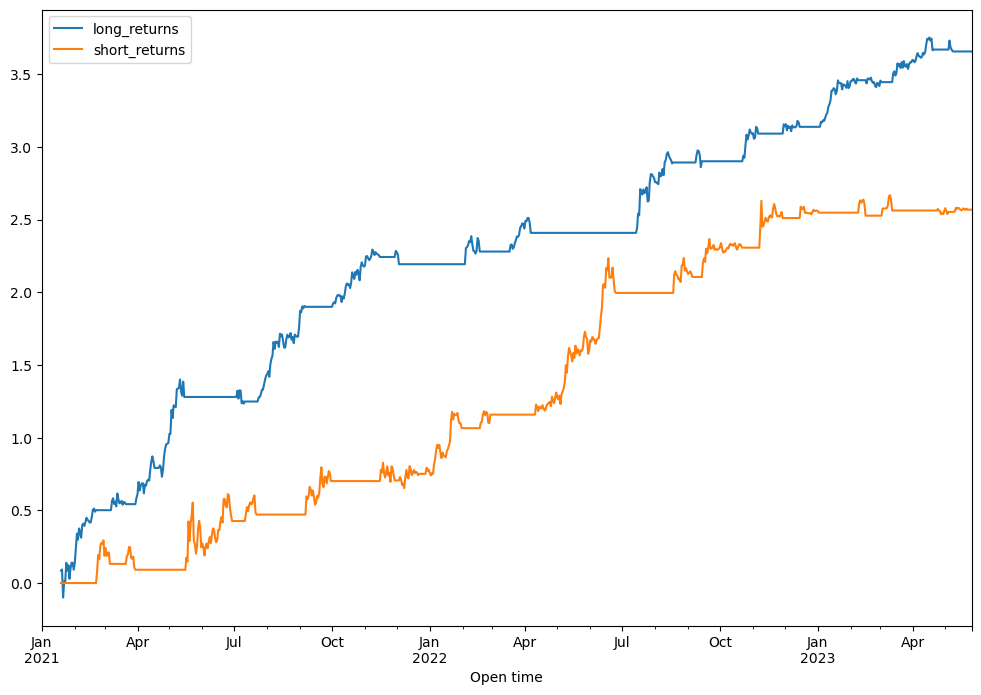

In [31]:
# plot the returns
eth[['long_returns', 'short_returns']].cumsum().plot(figsize=(12,8))


<Axes: xlabel='Open time'>

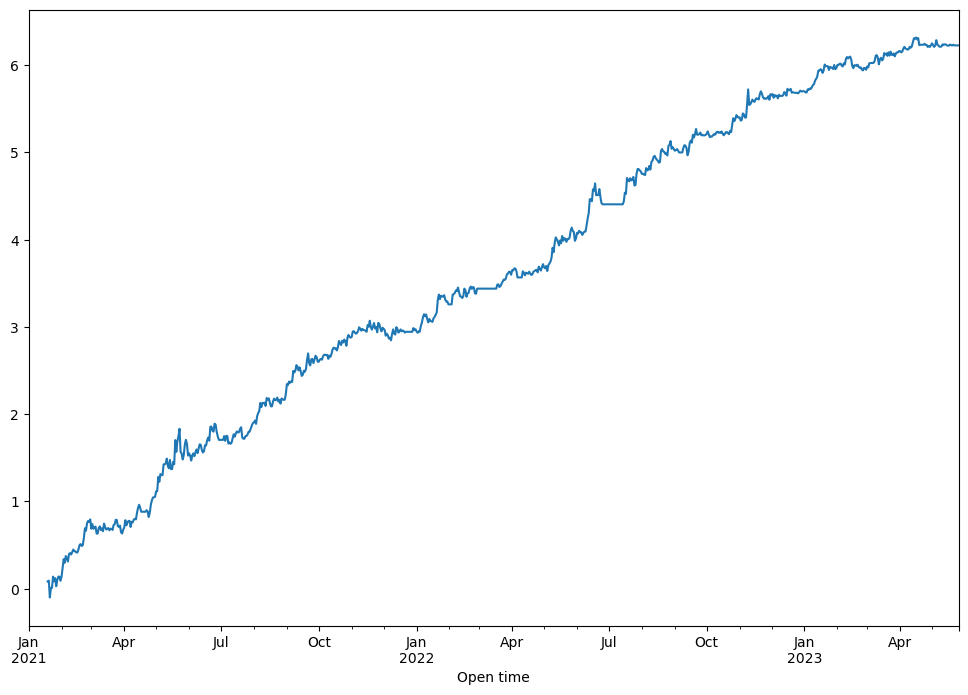

In [32]:
# plot the equity curve 
eth['equity_curve'] = eth['long_returns'].cumsum() + eth['short_returns'].cumsum()
eth['equity_curve'].plot(figsize=(12,8))

In [33]:
# show key statistics 
eth[['long_returns', 'short_returns']].describe()

,long_returns,short_returns
count,858.000000,858.000000
mean,0.004261,0.002993
std,0.028884,0.035068
min,-0.193197,-0.263329
25%,0.000000,0.000000
50%,-0.000000,0.000000
75%,0.001390,0.000000
max,0.181070,0.277372


In [34]:
#show key statistics using vectorbtpro include number of trades and win rate and short performance vs. long performance
eth[['long_returns', 'short_returns']].vbt.returns(freq='1d').stats() 

Start                        2021-01-01 00:00:00+00:00
End                          2023-05-26 00:00:00+00:00
Period                               876 days 00:00:00
Total Return [%]                            1638.10162
Annualized Return [%]                       214.666322
Annualized Volatility [%]                    61.090154
Max Drawdown [%]                             27.181548
Max Drawdown Duration                111 days 12:00:00
Sharpe Ratio                                  2.224318
Calmar Ratio                                  9.553158
Omega Ratio                                   1.639479
Sortino Ratio                                 3.886533
Skew                                          0.735747
Kurtosis                                      10.48876
Tail Ratio                                    1.577947
Common Sense Ratio                            5.018388
Value at Risk                                -0.038868
Name: agg_stats, dtype: object